<a href="https://colab.research.google.com/github/KatyBrown/roman_work_experience/blob/main/roman_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup

Install CIAlign and clone the Git repository with the example data

In [3]:
%pip install CIAlign

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 819.0 kB/s eta 0:00:00


In [1]:
!git clone https://github.com/KatyBrown/roman_work_experience.git

Cloning into 'roman_work_experience'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 38 (delta 10), reused 35 (delta 8), pack-reused 0
Receiving objects: 100% (38/38), 1.43 MiB | 7.90 MiB/s, done.
Resolving deltas: 100% (10/10), done.


Import the module files

In [6]:
import CIAlign.utilityFunctions as utilityFunctions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read Files

Set the working directory


In [7]:
mydir = 'roman_work_experience'

Read the sequence alignment into an array and sequence names into a list


In [8]:
arr, nams = utilityFunctions.FastaToArray(
    "%s/small/small_alignment.fasta" % mydir)

Read the consensus sequence and convert it to a list, then an array


In [9]:
file_contents = open("%s/small/small_consensus.fasta" % mydir).readlines()
sequence = file_contents[1].strip()
sequence_array = np.array(list(sequence))

### Numpy examples
See the first column of the alignment array

In [10]:
arr_col_1 = arr[:, 0]
arr_col_1

array(['A', 'A', 'A', 'A', 'A', 'A', 'A'], dtype='<U1')

See the third row of the array

In [11]:
arr_row_3 = arr[2, :]
arr_row_3

array(['A', 'T', 'T', 'C', 'T', 'A', 'T', 'C', 'T', 'G', 'G', 'G', 'T',
       'A', 'C', 'T', 'A', 'T', 'T', 'G', 'G', 'G', 'C', 'T', 'C', 'T',
       'T', 'A', 'T', 'T', 'A', 'T', 'C', 'T', 'C', 'T', 'A', 'C', 'T',
       'T', 'A', 'C', 'T', 'A', 'T', 'C', 'T', 'T', 'A', 'C', 'T', 'T',
       'A', 'C', 'T', 'T', 'A', 'C', 'T', 'T', 'A', 'C', 'G', 'C', 'T',
       'A', 'C', 'G', 'T', 'A', 'C', 'T', 'A', 'G', 'C', 'T', 'T', 'A',
       'C', 'G', 'T', 'A', 'C', 'T', 'G', 'A', 'C', 'T', 'T', '-', '-',
       '-', '-'], dtype='<U1')

See which cells are equal to "A"

In [12]:
is_A = arr == "A"
is_A

array([[ True, False, False, False, False,  True, False, False, False,
        False, False, False, False, False,  True, False, False,  True,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False,  True, False, False,  True, False, False, False, False,
         True, False, False, False,  True, False, False, False,  True,
        False, False, False,  True, False, False, False, False, False,
        False,  True, False, False, False,  True, False, False,  True,
        False, False, False, False,  True, False, False, False,  True,
        False, False, False,  True, False, False, False,  True, False,
        False, False, False],
       [ True, False, False, False, False,  True, False, False, False,
        False, False, False, False, False,  True, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, Fals

Count the number of "As" in the first column


In [13]:
nAs = sum(is_A[:, 0])
nAs

7

Count the number of "As" in all columns

In [14]:
nAs_all = sum(arr == "A")
nAs_all

array([7, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 4, 2, 1, 4, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 6, 1, 0, 1, 0, 1, 4, 2, 0, 0, 5, 0, 1, 4,
       0, 2, 1, 0, 5, 2, 2, 1, 4, 1, 0, 0, 4, 1, 0, 0, 5, 0, 0, 0, 1, 3,
       0, 0, 1, 3, 0, 1, 3, 0, 0, 0, 1, 3, 0, 0, 1, 3, 0, 0, 1, 3, 0, 0,
       1, 2, 2, 2, 2])

### For later

Plot the number of As in each column

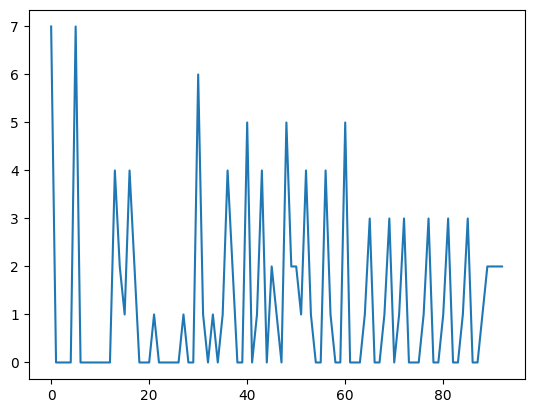

In [15]:
plt.plot(nAs_all)

Plot the True / False values from the is_A matrix

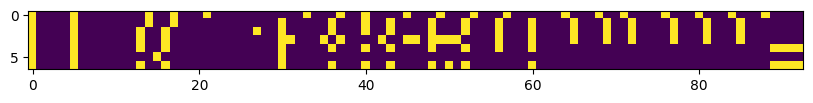

In [16]:
plt.figure(figsize=(10, 10))
plt.imshow(is_A)

Read a similarity matrix and find the similarity score between 'A' and 'G

In [29]:
mat = pd.read_csv("%s/similarity_matrices/NUC.4.4" % mydir, comment="#", sep="\s+")

In [32]:
mat.loc['A', 'G']

-4